<a href="https://colab.research.google.com/github/ShephaliJain/Shephali_Data_Analyst_Portfolio_Projects/blob/main/Python_Projects/Wine_Quality_Analysis/WineQualityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the necessary Libraries and the dataset**

In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random

from sklearn import preprocessing
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [119]:
##Importing the dataset
wine_red = pd.read_csv('winequality-red.csv',sep = ',')

### Lets see how our data looks - quick glimpse

In [120]:
wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Lets check if we have to deal with missing values?

In [121]:
wine_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Great!! We don't have any null values or gaps in our dataset.

In [81]:
wine_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

So, we have total of 1599 rows (observations) and 12 columns as variables in our dataset.

### **Descriptive Statistics of the dataset**

In [116]:
#the regular way
wine_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

In [117]:
#more organized way
wine_red.describe()[1:].T.style.background_gradient(cmap='Blues')

### **Exploratory Data Analysis** : Lets explore the data!

In [84]:
fig = go.Figure()

for x in range(10):
    fig.add_trace(go.Box(
        x=wine_red[wine_red['quality']==x]['volatile acidity'],
        y=wine_red[wine_red['quality']==x]['quality'], name='Quality '+str(x)
    ))

fig.update_layout(
    yaxis_title='quality', xaxis_title='volatile acidity'
)
fig.update_traces(orientation='h')
fig.show()

**Volatile acidity has a correlation value of 0.407.
It can be seen in the boxplot that lower values of volatile acidity has higher values of quality.**

In [13]:
fig = px.scatter(wine_red, x="total sulfur dioxide", y="free sulfur dioxide", color=wine_red['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')

**Insights**

- Looks like higher levels of total sulfur dioxide means higher values of free sulfur dioxide.
- Low levels of free sulfur dioxide and total sulfur dioxide usually mean a better quality.

In [122]:
fig = go.Figure()

for x in range(10):
    fig.add_trace(go.Box(
        x=wine_red[wine_red['quality']==x]['citric acid'],
        y=wine_red[wine_red['quality']==x]['quality'], name='Quality '+str(x)
    ))

fig.update_layout(
    yaxis_title='quality', xaxis_title='citric acid'
)
fig.update_traces(orientation='h')
fig.show()

**Insights**

- citric acid has a correlation value of 0.241
- Wines with high levels of citric acid usually fall into the quality category of 0 and 5

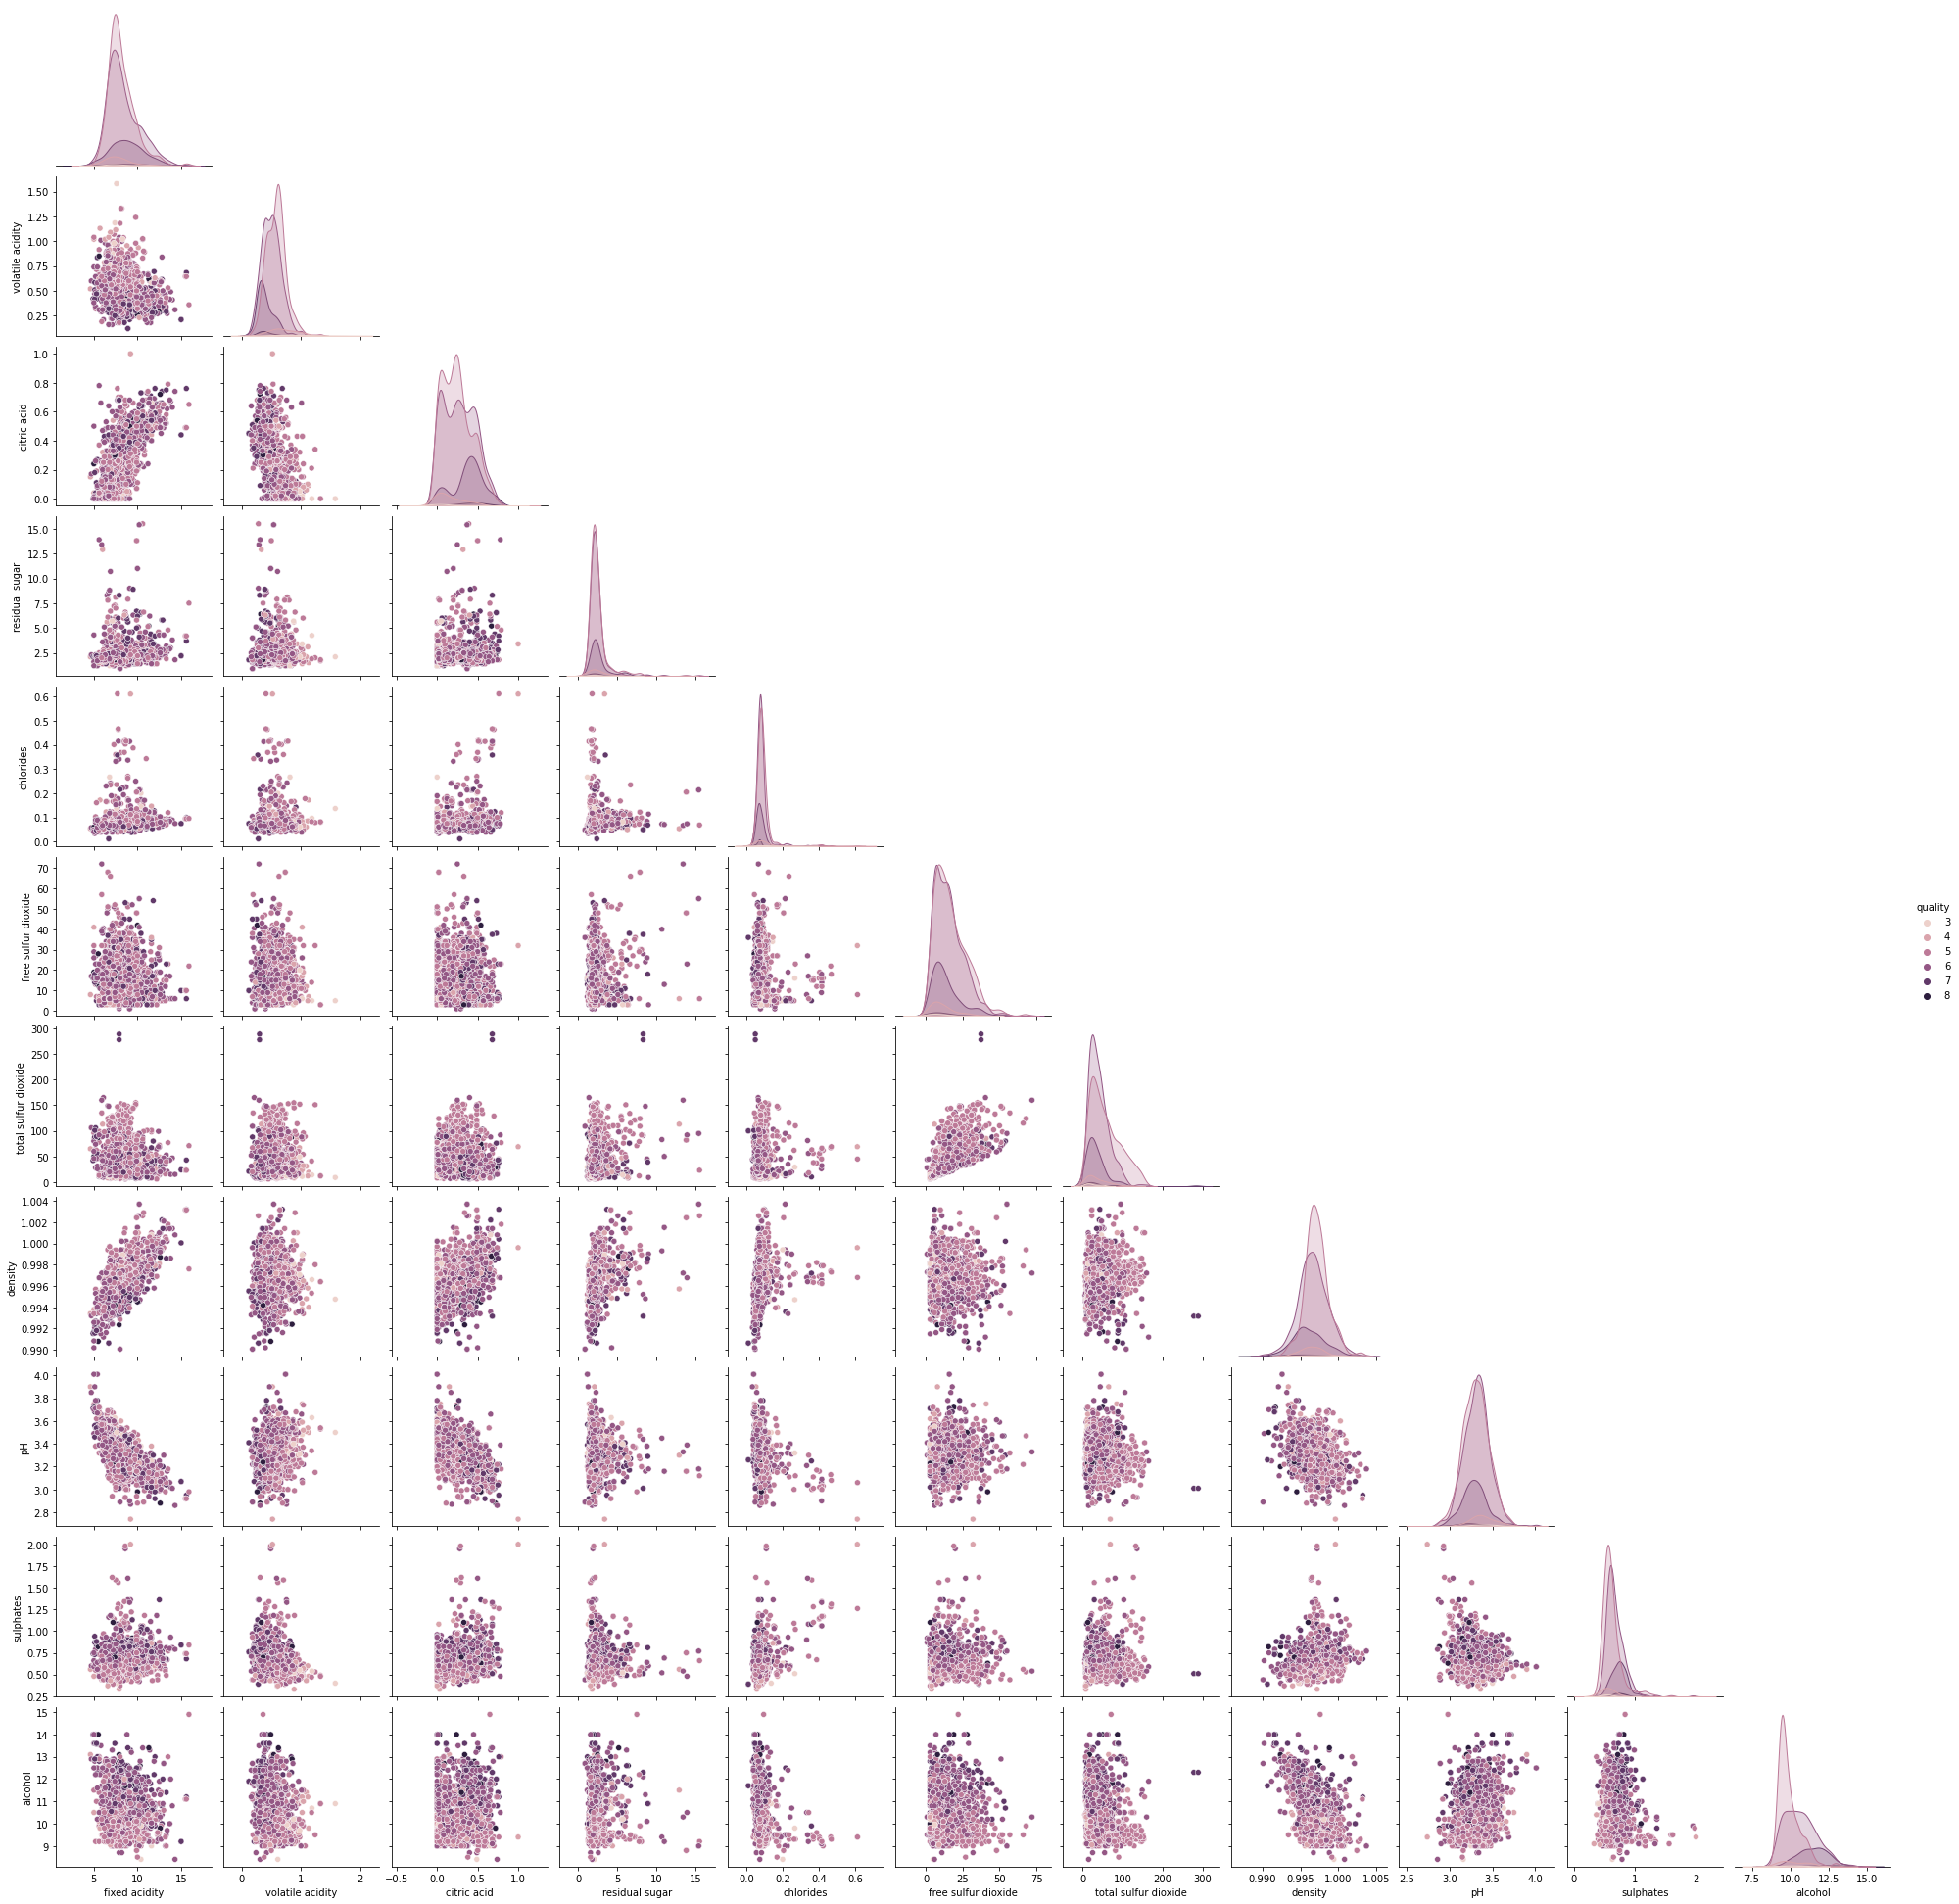

In [12]:
columns = wine_red.columns
sns.pairplot(wine_red[columns],hue='quality',corner=True)

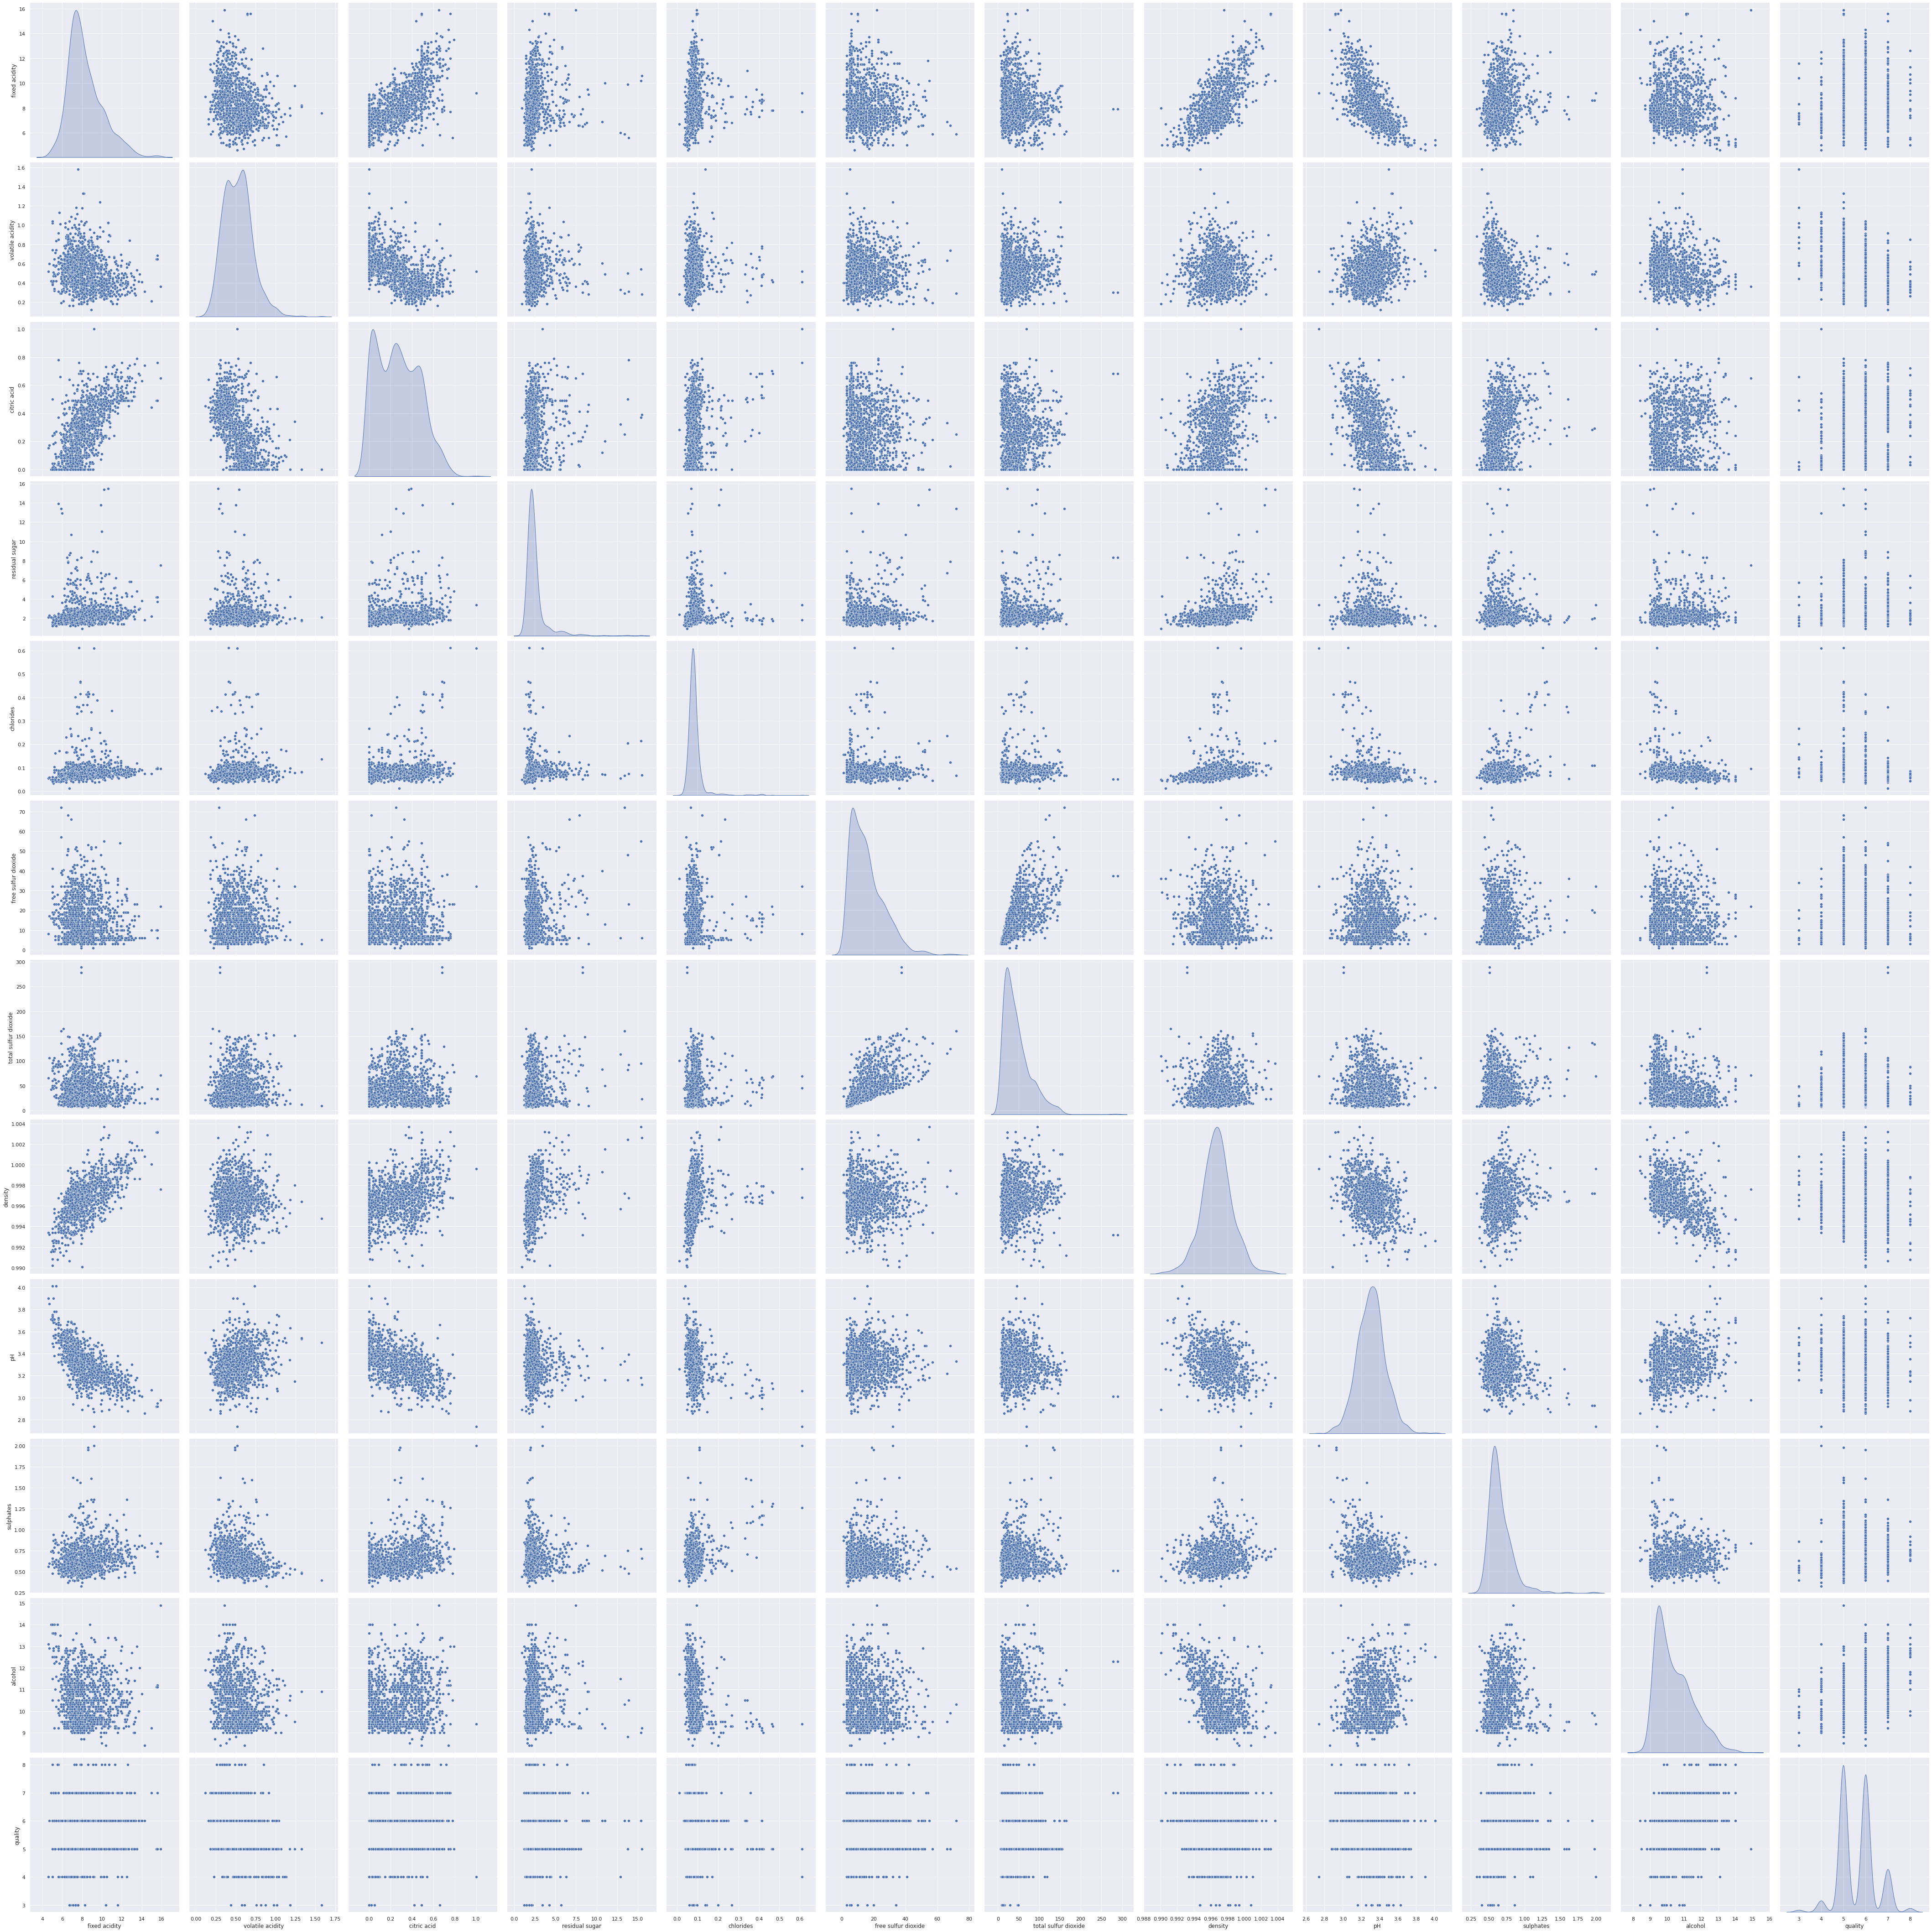

In [ ]:
#regular view - kernal density plot
columns = wine_red.columns
sns.set()
sns.pairplot(wine_red[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

#### **Unique Values**

In [75]:
wine_red['quality'].unique()

array([0])

#### **Quantitative distribution**

In [ ]:
fig = go.Figure(data=[go.Pie(labels=wine_red['quality'].value_counts().index, values=wine_red['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

#### **Outliers Check**

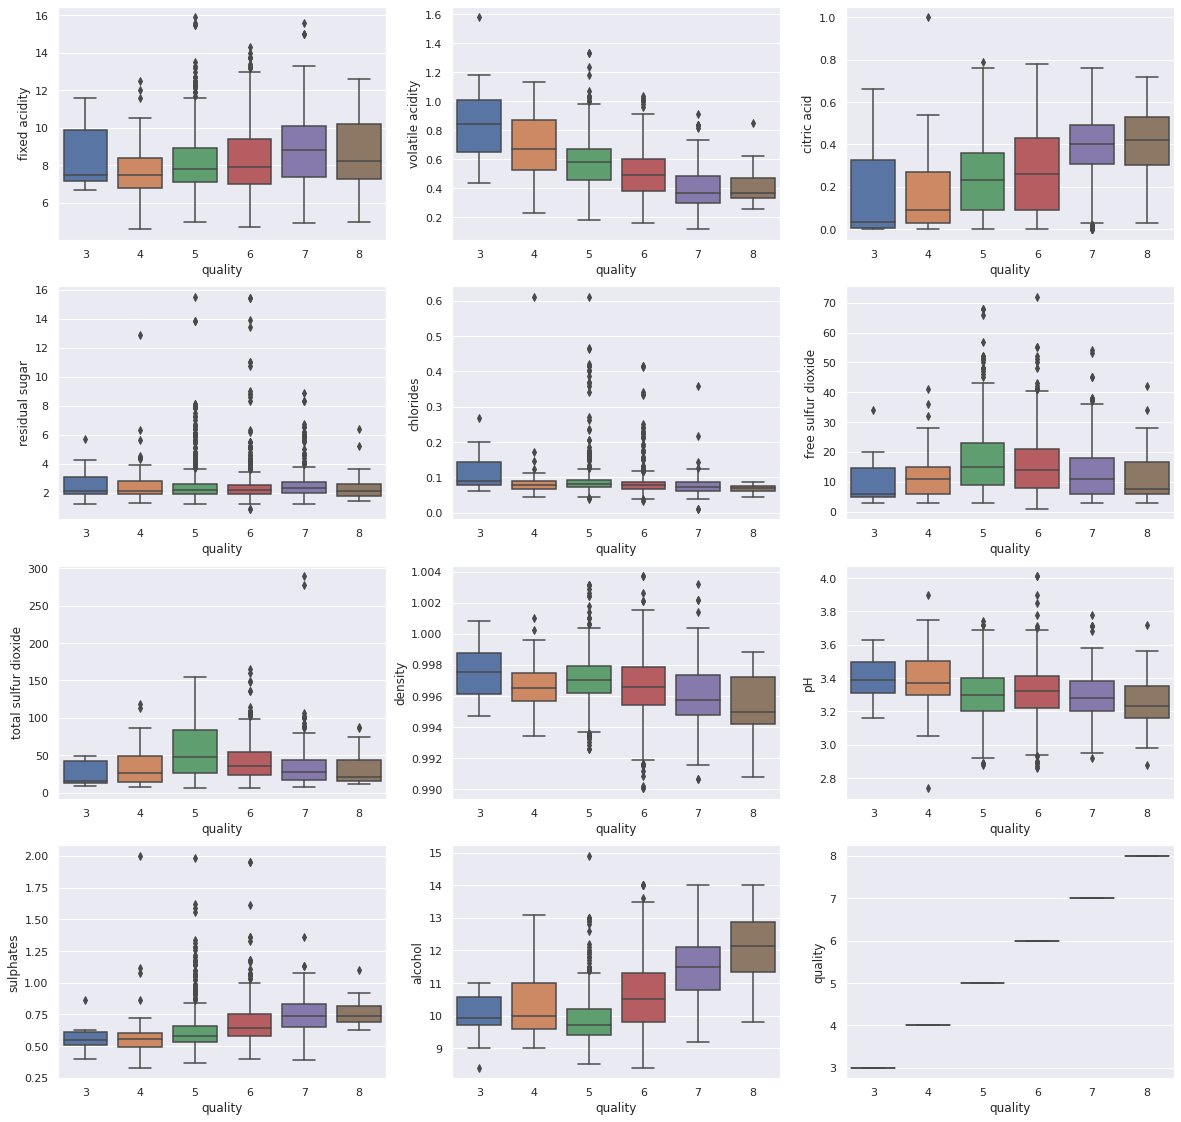

In [ ]:
i=1
plt.figure(figsize=(20,30))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y = wine_red[feature], x = wine_red['quality'])
    i+= 1

#### **Density Distribution**

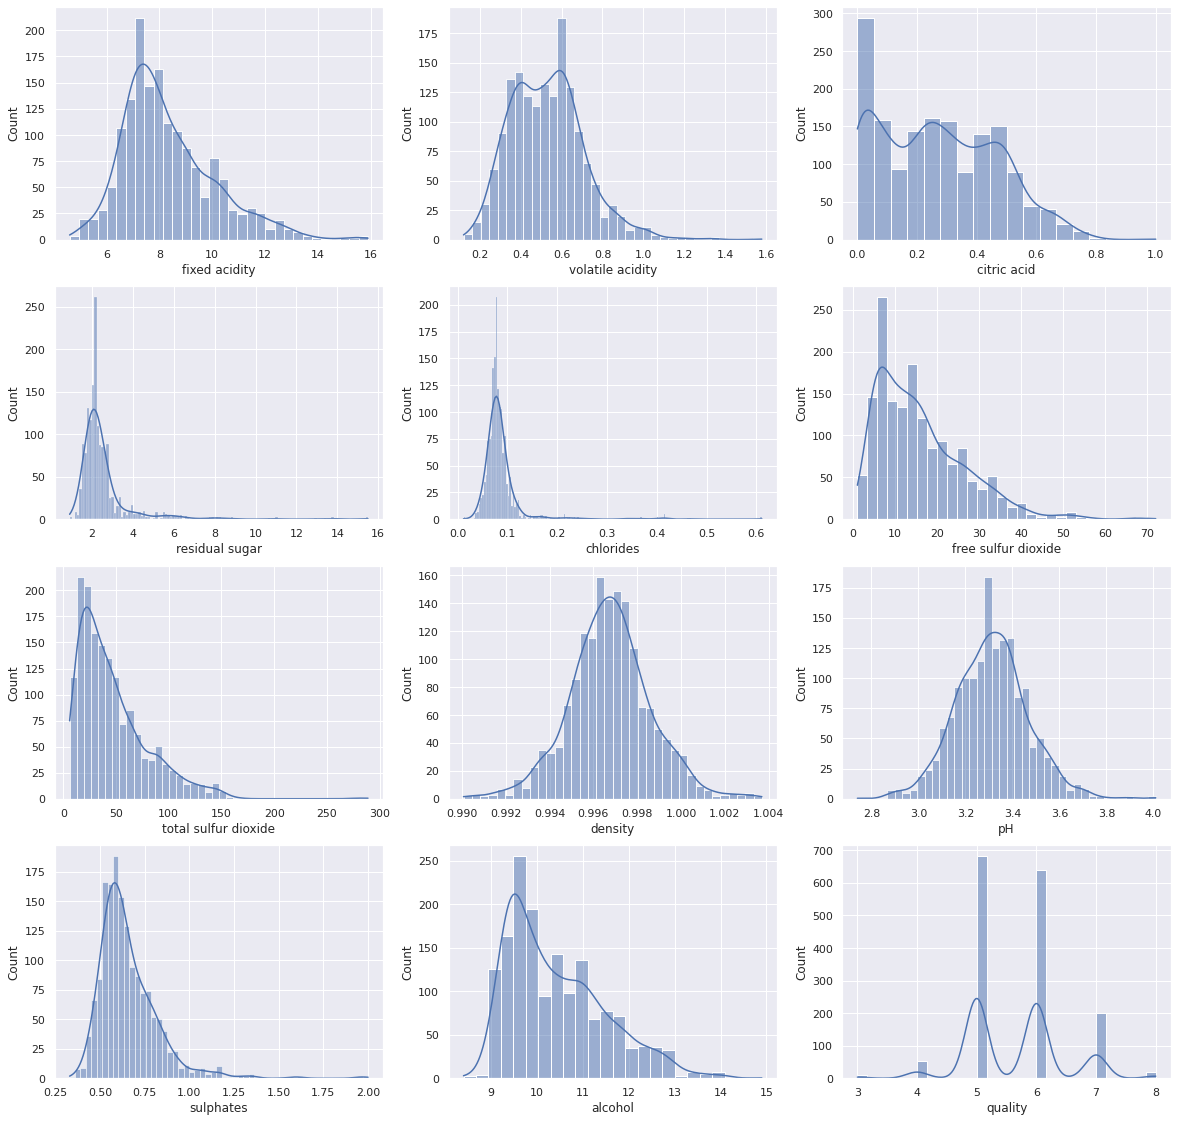

In [ ]:
i=1
plt.figure(figsize = (20,30))
for feature in columns:
    plt.subplot(6,3,i)
    sns.histplot(wine_red[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

In [ ]:
wine_red.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### **Correlation**

In [85]:
corr = wine_red.corr()

print(corr['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'free sulfur dioxide', 'pH', 'chlorides', 'density'],
      dtype='object')


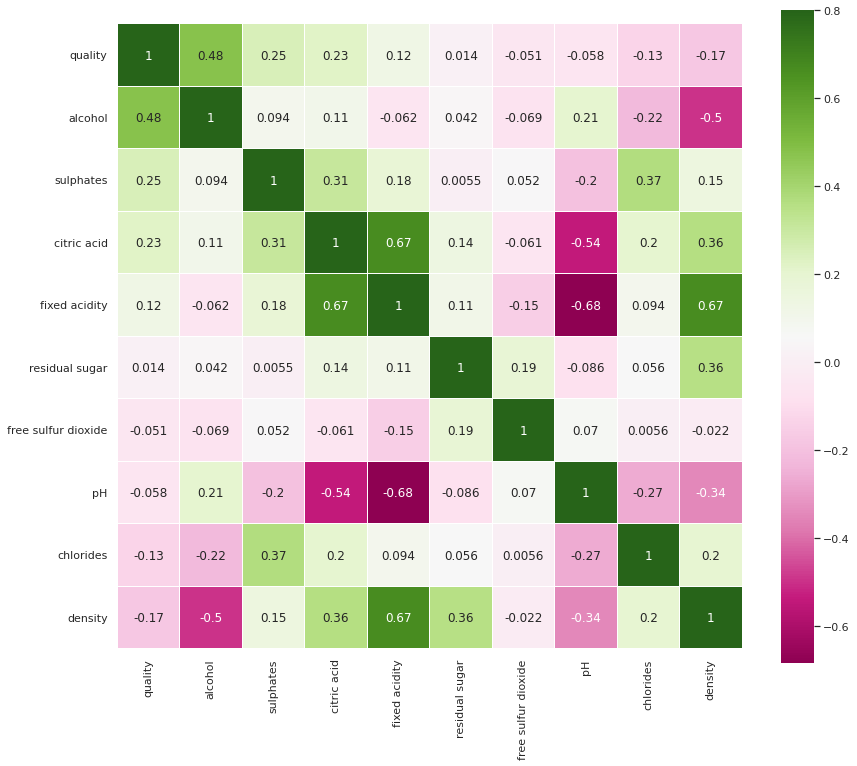

In [ ]:
##Using seaborn library to visualize correlations if any
k= 10
cols = corr.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(wine_red[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='PiYG',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [123]:
## Make a copy of orignal data
df = wine_red.copy()
df1 = wine_red.copy()
df.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5

#### **Split into feature and target variables and Standardise them**

In [124]:
y = df['quality']
df = df.drop(['quality'],axis=1)

In [125]:
#Rescaling all the variables to have values between 0 and 1
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788           0.39726          0.0        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845               0.09894  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846

In [126]:
##Creating bins for wine quality (2-5 Bad and 5-8 as Good)
bins = [2,6,8]
names = ['Bad','Good']
wine_red['quality'] = pd.cut(wine_red['quality'],bins = bins, labels = names)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



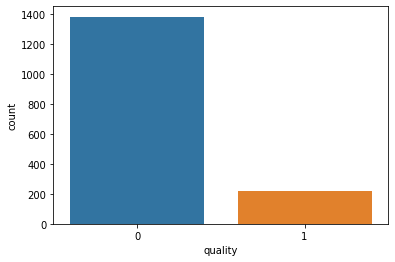

In [127]:
##using label encoder to encode values of bad as 0 and good as 1
label_quality = LabelEncoder()
wine_red['quality'] = label_quality.fit_transform(wine_red['quality'])
## Counting the number of good and bad wines
sns.countplot(wine_red['quality'])

In [128]:
##Assigning 
X = wine_red.drop('quality', axis = 1)
y = wine_red.iloc[:,-1].values

In [129]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
# Feature Scaling to put all variables on the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
### Working with the copy for testing the alternate way
df.describe().T[['min', 'max']][:-1].style.background_gradient(cmap='Blues')

#### **Working with Copy dataframe df1**

In [132]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    df1[col] = df1[col]/df1[col].max()

In [133]:
features = np.array(df1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
labels = np.array(df1['quality'])

In [134]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(features, labels, test_size=0.2, random_state=0)

In [135]:
model_comparison = {}

In [136]:
parameters = {'C': [6,8,10,12,14,16], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train1, y_train1)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred1 = clf.predict(x_val1)
model_comparison['SVC'] = [accuracy_score(y_val1,y_pred1), f1_score(y_val1,y_pred1, average='weighted')]
print('\n')
print(classification_report(y_val1,y_pred1, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 14, 'kernel': 'poly'}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.65      0.76      0.70       135
           6       0.62      0.61      0.61       142
           7       0.38      0.30      0.33        27
           8       1.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.77      0.28      0.28       320
weighted avg       0.63      0.62      0.60       320



In [137]:
### Decision Tree Classifier

parameters = {'max_depth': [5,10,15,20]}

Tree_model = DecisionTreeClassifier()

clf = GridSearchCV(Tree_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train1, y_train1)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val1)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_val1,y_pred1), f1_score(y_val1,y_pred1, average='weighted')]
print('\n')
print(classification_report(y_val1,y_pred1, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 5}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.65      0.76      0.70       135
           6       0.62      0.61      0.61       142
           7       0.38      0.30      0.33        27
           8       1.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.77      0.28      0.28       320
weighted avg       0.63      0.62      0.60       320



In [138]:
### Knearest Classifier
parameters = {'n_neighbors': [10,20,30,40,50]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train1, y_train1)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val1)
model_comparison['KNeighborsClassifier'] = [accuracy_score(y_val1,y_pred1), f1_score(y_val1,y_pred1, average='weighted')]
print('\n')
print(classification_report(y_val1,y_pred1, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'n_neighbors': 50}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.65      0.76      0.70       135
           6       0.62      0.61      0.61       142
           7       0.38      0.30      0.33        27
           8       1.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.77      0.28      0.28       320
weighted avg       0.63      0.62      0.60       320



In [139]:
parameters = {'n_estimators': [160,180,200], 'max_depth':[18,20,22,24]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train1, y_train1)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val1)
model_comparison['RandomForestClassifier'] = [accuracy_score(y_val1,y_pred1), f1_score(y_val1,y_pred1, average='weighted')]
print('\n')
print(classification_report(y_val1,y_pred1, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 18, 'n_estimators': 200}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.65      0.76      0.70       135
           6       0.62      0.61      0.61       142
           7       0.38      0.30      0.33        27
           8       1.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.77      0.28      0.28       320
weighted avg       0.63      0.62      0.60       320



In [140]:
### XGBoost
parameters = {'n_estimators': [100, 150, 200], 'max_depth':[16, 18, 20]}

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

clf = GridSearchCV(xgboost, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train1, y_train1)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val1)
model_comparison['XGBoost'] = [accuracy_score(y_val1, y_pred1), f1_score(y_val1,y_pred1, average='weighted')]
print('\n')
print(classification_report(y_val1,y_pred1, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 18, 'n_estimators': 200}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.65      0.76      0.70       135
           6       0.62      0.61      0.61       142
           7       0.38      0.30      0.33        27
           8       1.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.77      0.28      0.28       320
weighted avg       0.63      0.62      0.60       320



In [141]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

#### **When the target variable is just categorized into 1 or 0 encoded value**

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [143]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*60, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       290
           1       0.63      0.63      0.63        30

    accuracy                           0.93       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.93      0.93      0.93       320

------------------------------------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       290
           1       0.55      0.57      0.56        30

    accuracy                           0.92       320
   macro avg       0.75      0.76      0.76       320
weighted avg       0.92      0.92      0.92       320

------------------------------------------------------------ 

model: SVC()
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       290
           1       0.64      0.30   

In [144]:
clf=RandomForestClassifier()
parametres={'criterion':['gini'],
            'n_estimators':[150],
           'max_depth':[12],
            'min_samples_split':[8],
            'min_samples_leaf':[2]}
grid_search_cv_clf=GridSearchCV(clf,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf2=grid_search_cv_clf.best_estimator_
y_pred2=best_clf2.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       290
           1       0.58      0.47      0.52        30

    accuracy                           0.92       320
   macro avg       0.76      0.72      0.74       320
weighted avg       0.91      0.92      0.91       320



### **Model Evaluation**

#### **Option-1**

In [145]:
##Applying Random Forest algorithm to see results with 200 as number of estimaters
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)
##Fitting the model to the training set
rfscore= random_forest .fit(X_train, y_train)
##Predicting the value of test set using the trained model
y_pred_rf= random_forest.predict(X_test)
##Confusion Matrix to see the accuracy of the model and it turns out to be 66%
print("Training set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_train,y_train)))
print("Test set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_test,y_test)))

Training set score of RandomForestClassifier: 1.000
Test set score of RandomForestClassifier: 0.944


In [146]:
y_pred_rf
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)
print('Accuracy Score: %.3f' % accuracy_score(y_test,y_pred))

[[283   7]
 [ 11  19]]
Accuracy Score: 0.909


In [147]:
##Using alterante Model(SVM) to see the model performance
from sklearn.metrics import confusion_matrix
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
##Confusion Matrix for the SVM mmodel with acuuracy 89%, 
##but with higher number of true positives and lesser true negatives
cm_svc=confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
print('Accuracy Score: %.3f' % accuracy_score(y_test,y_pred_svc))

[[285   5]
 [ 21   9]]
Accuracy Score: 0.919


In [148]:
##Performing 10 fold cross validation to increase the performance of the Random Forest, turns out that there is no much improvement
rfc_eval = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 35)
rfc_eval.mean()

0.9055555555555554

#### **Option-2**

In [149]:
# Modeling
from sklearn.linear_model import LogisticRegression, LinearRegression #binary classification model for both categorical and numerical 
from sklearn.tree import DecisionTreeClassifier #generates tree with set of rules, which represent model of different classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #operates among multiple decision tress to get the best result
from xgboost.sklearn import XGBClassifier #parallel computation of a tree learning algorithm as well as linear model learning to arrive at predictions
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, r2_score
import sklearn.metrics as metrics
linear = LinearRegression()
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2222)
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)
svm = SVC(random_state = 2222)
mnb = MultinomialNB()
gaussian = GaussianNB()
sgd = SGDClassifier(random_state=2222)

In [151]:
logreg1 = logreg.fit(X_train,y_train) #logreg = LogisticRegression()
print("Training set score of LogisticRegression: {:.3f}".format(logreg1.score(X_train,y_train)))
print("Test set score of LogisticRegression: {:.3f}".format(logreg1.score(X_test,y_test)))

DTscore = tree.fit(X_train,y_train) #tree = DecisionTreeClassifier(random_state = 2222)
print("Training set score of Decision tree: {:.3f}".format(DTscore.score(X_train,y_train)))
print("Test set score of Decision tree: {:.3f}".format(DTscore.score(X_test,y_test)))

knnscore = knn.fit(X_train,y_train) #knn = KNeighborsClassifier()
print("Training set score of knn: {:.3f}".format(knnscore.score(X_train,y_train)))
print("Test set score of knn: {:.3f}".format(knnscore.score(X_test,y_test)))

rfscore = rf.fit(X_train,y_train) #rf = RandomForestClassifier(random_state = 2222)
print("Training set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_train,y_train)))
print("Test set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_test,y_test)))

adascore = ada.fit(X_train,y_train) #ada = AdaBoostClassifier(random_state = 2222)
print("Training set score of AdaBoostClassifier: {:.3f}".format(adascore.score(X_train,y_train)))
print("Test set score of AdaBoostClassifier: {:.3f}".format(adascore.score(X_test,y_test)))

gradscore = grad.fit(X_train,y_train) #grad = GradientBoostingClassifier(random_state = 2222)
print("Training set score of GradientBoostingClassifier: {:.3f}".format(gradscore.score(X_train,y_train)))
print("Test set score of GradientBoostingClassifier: {:.3f}".format(gradscore.score(X_test,y_test)))

xgbscore = xgboost.fit(X_train,y_train) #xgboost = XGBClassifier(random_state = 2222)
print("Training set score of XGBoostingClassifier: {:.3f}".format(xgbscore.score(X_train,y_train)))
print("Test set score of XGBoostingClassifier: {:.3f}".format(xgbscore.score(X_test,y_test)))


svmscore = svm.fit(X_train,y_train) #svm = SVC(random_state = 2222)
print("Training set score of SVM: {:.3f}".format(svmscore.score(X_train,y_train)))
print("Test set score of SVM: {:.3f}".format(svmscore.score(X_test,y_test)))

# gsn = gsn.fit(X_train,y_train) #gsn = GaussianNB(random_state = 2222)
# print("Training set score of NaiveBayes: {:.3f}".format(gsnscore.score(X_train,y_train)))
# print("Test set score of NaiveBayes: {:.3f}".format(gsnscore.score(X_test,y_test)))

# mnbscore = mnb.fit(X_train,y_train) #mnb = MultinomialNB(random_state = 2222)
# print("Training set score of NaiveBayes: {:.3f}".format(mnbscore.score(X_train,y_train)))
# print("Test set score of NaiveBayes: {:.3f}".format(mnbscore.score(X_test,y_test)))

sgdscore = sgd.fit(X_train,y_train) #sgd = SGDClassifier(random_state=2222)
print("Training set score of Stochastic Gradient Descent: {:.3f}".format(sgdscore.score(X_train,y_train)))
print("Test set score of Stochastic Gradient Descent: {:.3f}".format(sgdscore.score(X_test,y_test)))

Training set score of LogisticRegression: 0.873
Test set score of LogisticRegression: 0.903
Training set score of Decision tree: 1.000
Test set score of Decision tree: 0.894
Training set score of knn: 0.898
Test set score of knn: 0.916
Training set score of RandomForestClassifier: 1.000
Test set score of RandomForestClassifier: 0.941
Training set score of AdaBoostClassifier: 0.906
Test set score of AdaBoostClassifier: 0.909
Training set score of GradientBoostingClassifier: 0.965
Test set score of GradientBoostingClassifier: 0.912
Training set score of XGBoostingClassifier: 0.945
Test set score of XGBoostingClassifier: 0.909
Training set score of SVM: 0.894
Test set score of SVM: 0.919
Training set score of Stochastic Gradient Descent: 0.852
Test set score of Stochastic Gradient Descent: 0.906


In [153]:
#Model Training
model = LinearRegression()
model.fit(X_train,y_train)
#Model Prediction
y_pred_linear = model.predict(X_test)
r_squared = r2_score(y_test,y_pred_linear)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R-squared R^Score : .%3f' %r_squared)
print('Adjusted R^Score : .%3f' %adjusted_r_squared)

R-squared R^Score : .0.074753
Adjusted R^Score : .0.068340


In [154]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred1 = logreg.predict(X_test)
Acc_log_train = round(logreg.score(X_train, y_train)* 100, 2)
print(Acc_log_train)
Acc_log_test = round(logreg.score(X_test, y_test)* 100, 2)
print(Acc_log_test)

87.33
90.31


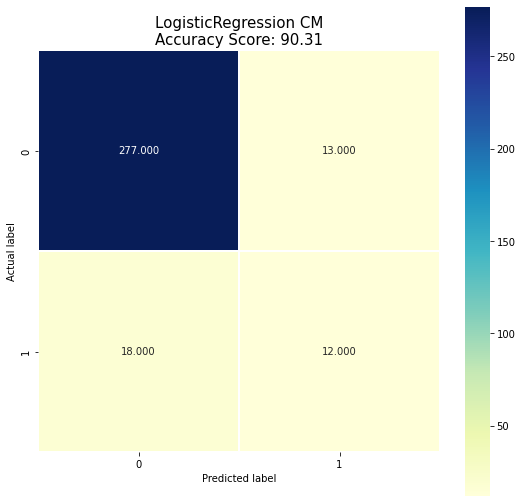

In [155]:
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=0.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogisticRegression CM\nAccuracy Score: {0}'.format(Acc_log_test)
plt.title(all_sample_title, size = 15);

In [156]:
#Applying the Support Vector Machine algorithm
svm = SVC(random_state = 2222)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

acc_linear_svc = round(svm.score(X_train, y_train) * 100, 2)
acc_svc_2 = round(svm.score(X_test, y_test)*100,2)
acc_svc_2

91.88

In [157]:
#Random Forest: train a random forest algorithm

random_forest= RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest_train = round(random_forest.score(X_train, y_train)*100, 2)
print(acc_random_forest_train)
acc_random_forest_test = round(random_forest.score(X_test, y_test)*100, 2)
print(acc_random_forest_test)

100.0
93.12


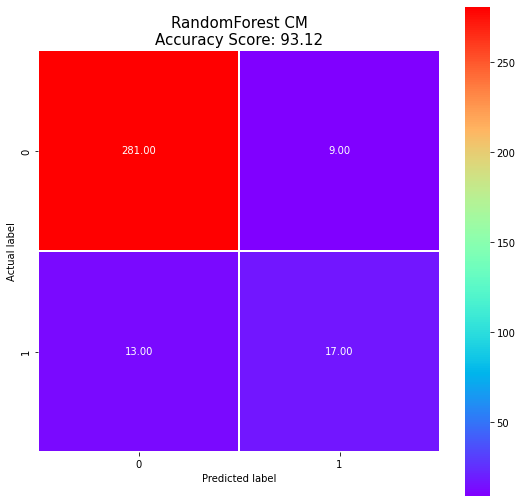

In [158]:
cm2 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'rainbow');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RandomForest CM\nAccuracy Score: {0}'.format(acc_random_forest_test)
plt.title(all_sample_title, size = 15);

82.5


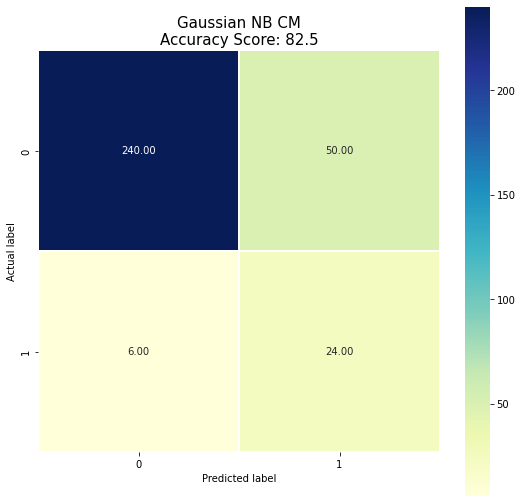

In [159]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gau = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gau_2 = round(gaussian.score(X_test, y_test)*100,2)
print(acc_gau_2)
cm7 = confusion_matrix(y_test, y_pred_gau)
plt.figure(figsize=(9,9))
sns.heatmap(cm7, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Gaussian NB CM\nAccuracy Score: {0}'.format(acc_gau_2)
plt.title(all_sample_title, size = 15);

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbctraining_score = cross_val_score(gbc, X_train, y_train, cv=5)
gbctest_score = cross_val_score(gbc, X_test, y_test, cv=5)
print('Accuracy of gbc on train set: {:.2f}'.format(gbc.score(X_train, y_train)))
print('gbc has a cross validation training score of {:.2f}'.format(gbctraining_score.mean()))
print('gbc has a cross validation test score of {:.2f}'.format(gbctest_score.mean()))

Accuracy of gbc on train set: 0.96
gbc has a cross validation training score of 0.88
gbc has a cross validation test score of 0.89


In [161]:
gbc2 = GradientBoostingClassifier(learning_rate= 0.05, n_estimators = 500, random_state=42)
gbc2.fit(X_train, y_train)
gbc2training_score = cross_val_score(gbc2, X_train, y_train, cv=5)*100
gbc2test_score = cross_val_score(gbc2, X_test, y_test, cv=5)*100
print('Accuracy of gbc2 on train set: {:.2f}'.format(gbc2.score(X_train, y_train)*100))
print('gbc2 has a cross validation training score of {:.2f}'.format(gbc2training_score.mean()))
print('gbc2 has a cross validation test score of {:.2f}'.format(gbc2test_score.mean()))

Accuracy of gbc2 on train set: 99.14
gbc2 has a cross validation training score of 89.06
gbc2 has a cross validation test score of 89.06


In [162]:
from sklearn.metrics import confusion_matrix
y_pred_gbc = gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
print(cm_gbc)

[[275  15]
 [ 13  17]]


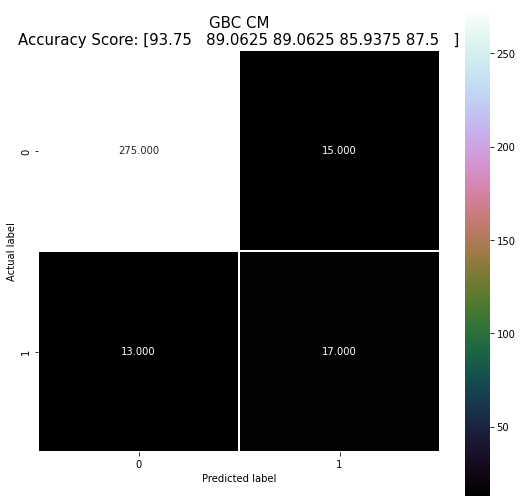

In [163]:
cm3 = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'cubehelix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'GBC CM\nAccuracy Score: {0}'.format(gbc2test_score)
plt.title(all_sample_title, size = 15);

88.44


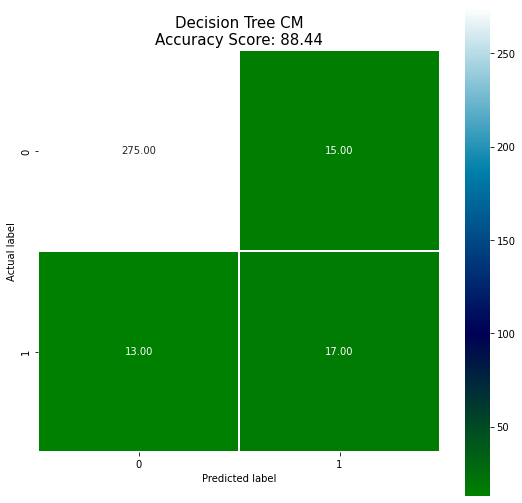

In [164]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_dt_2 = round(decision_tree.score(X_test, y_test)*100,2)
print(acc_dt_2)
cm4 = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'ocean');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree CM\nAccuracy Score: {0}'.format(acc_dt_2)
plt.title(all_sample_title, size = 15);

In [165]:
#XGB Classifier Model — Hyperparameter Tuning
parameter = {
    'max_depth':range(6,10,2), 
    'min_child_weight':range(1,5,5)
    }

XGBModel = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             cv=2
                            )

XGBModel.fit(X_train, y_train)

y_pred_xgb = XGBModel.predict(X_test)


Acc_XGB_train = round(XGBModel.score(X_train, y_train)* 100, 2)
print(Acc_XGB_train)
Acc_XGB_test = round(XGBModel.score(X_test, y_test)* 100, 2)
print(Acc_XGB_test)

99.69
93.12


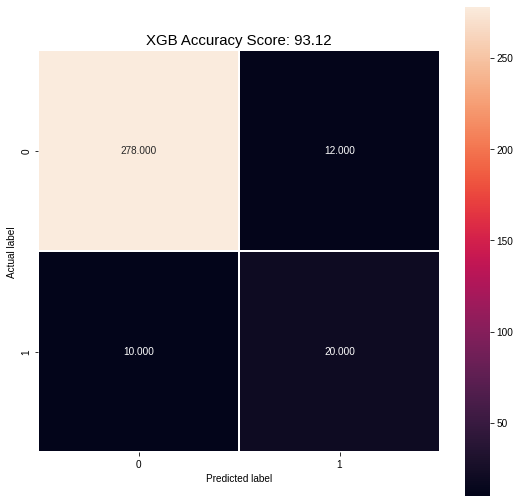

In [166]:
cm6 = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.style.use("seaborn");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XGB Accuracy Score: {0}'.format(Acc_XGB_test)
plt.title(all_sample_title, size = 15);

In [167]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Decision Tree', 'XGBoost'],
    'Score': [acc_svc_2, Acc_log_test, acc_random_forest_test, acc_gau_2, acc_dt_2,Acc_XGB_test ]})
#print(results)
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

Model
Score                         
93.12            Random Forest
93.12                  XGBoost
91.88  Support Vector Machines
90.31      Logistic Regression
88.44            Decision Tree
82.50     Gaussian Naive Bayes

### **The best performing models are Random Forest and XGBoost.**